# 鸢尾花的分类

In [2]:
## 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
## 超参数
epochs=500
validation_split=0.05
test_size=0.25
dense1_neurons =512 #第一层神经元的数量
dense2_neurons =256 #第二层神经元的数量
dense3_neurons =128 #第三层神经元的数量

## 1.提出问题

根据整理好的鸢尾花数据集，能够进行三种鸢尾花的分类。

## 2.数据的收集和整理

### 2.1 导入数据集

In [4]:
datasets_path = 'data/iris.data'
iris = pd.read_csv(datasets_path,header=None)
print(iris.sample(5))

       0    1    2    3                4
33   5.5  4.2  1.4  0.2      Iris-setosa
85   6.0  3.4  4.5  1.6  Iris-versicolor
135  7.7  3.0  6.1  2.3   Iris-virginica
64   5.6  2.9  3.6  1.3  Iris-versicolor
0    5.1  3.5  1.4  0.2      Iris-setosa


### 2.2 分割特征和标签

In [5]:
def print_ndarray_random_rows(array_name,rows=5):
    '''
    功能：输出numpy ndarray 的随机几行
    参数：array_name 数组名称
         rows 可选参数，不带入值时默认为5
    '''
    if array_name.ndim >1 :
        print(array_name[np.random.choice(array_name.shape[0], rows, replace=False), :])
    else:
        print(array_name[np.random.choice(array_name.shape[0], rows, replace=False)])
    return

In [6]:
# 转换为np.array
iris = np.array(iris)
print("\n=====数据集抽样显示=====")
print_ndarray_random_rows(iris)

# 提取特征
X= iris[:,0:4]
print("\n=====特征抽样显示=====")
print_ndarray_random_rows(X)

# 提取标签
Y = iris[:,4]
print("\n=====标签抽样显示=====")
print_ndarray_random_rows(Y)


=====数据集抽样显示=====
[[7.2 3.2 6.0 1.8 'Iris-virginica']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [5.9 3.0 4.2 1.5 'Iris-versicolor']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.6 3.4 1.4 0.3 'Iris-setosa']]

=====特征抽样显示=====
[[5.0 3.4 1.5 0.2]
 [5.7 4.4 1.5 0.4]
 [5.7 2.8 4.5 1.3]
 [7.2 3.0 5.8 1.6]
 [4.9 2.5 4.5 1.7]]

=====标签抽样显示=====
['Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa']


### 2.3 将标签转化为one-hot编码

In [7]:
# 将文本型类别转为为数字型类别
encoder = LabelEncoder()
encoder_Y = encoder.fit_transform(Y)
print("\n=====标签数值化的结果=====")
print_ndarray_random_rows(encoder_Y)

# 转化为 one-hot 编码
dummy_y = np_utils.to_categorical(encoder_Y)
print("\n=====标签的one-hot编码=====")
print_ndarray_random_rows(dummy_y)


=====标签数值化的结果=====
[0 2 1 1 1]

=====标签的one-hot编码=====
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## 2.4 分割训练集和测试集

In [8]:
# 拆分训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,dummy_y,test_size=test_size)
print("训练特征集的形状：" + str(X_train.shape))
print("训练标签集的形状：" + str(y_train.shape))
print("测试特征集的形状：" + str(X_test.shape))
print("测试标签集的形状：" + str(y_test.shape))

训练特征集的形状：(112, 4)
训练标签集的形状：(112, 3)
测试特征集的形状：(38, 4)
测试标签集的形状：(38, 3)


## 3.搭建模型

### 3.1 搭建模型

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=dense1_neurons,input_dim=4,activation='relu'))
model.add(tf.keras.layers.Dense(units=dense2_neurons,activation='relu'))
model.add(tf.keras.layers.Dense(units=dense3_neurons,activation='relu'))
#model.add(tf.keras.layers.Dropout(dropout_rate))
model.add(tf.keras.layers.Dense(units=3,activation="softmax"))
model.summary()  # 查看模型结构

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 167,171
Trainable params: 167,171
Non-trainable params: 0
_________________________________________________________________


###  3.2 编译模型

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

### 3.3 训练模型

In [11]:
history = model.fit(X,dummy_y,validation_split=validation_split,epochs=epochs)

Train on 142 samples, validate on 8 samples
Epoch 1/500
142/142 [==============================] - 1s 5ms/step - loss: 0.9674 - acc: 0.4437 - val_loss: 0.6660 - val_acc: 1.0000
Epoch 2/500
142/142 [==============================] - 0s 399us/step - loss: 0.6491 - acc: 0.6549 - val_loss: 0.5337 - val_acc: 1.0000
Epoch 3/500
142/142 [==============================] - 0s 188us/step - loss: 0.4673 - acc: 0.9648 - val_loss: 0.6438 - val_acc: 0.8750
Epoch 4/500
142/142 [==============================] - 0s 257us/step - loss: 0.3740 - acc: 0.8803 - val_loss: 0.2368 - val_acc: 1.0000
Epoch 5/500
142/142 [==============================] - 0s 198us/step - loss: 0.2972 - acc: 0.9366 - val_loss: 0.6141 - val_acc: 0.6250
Epoch 6/500
142/142 [==============================] - 0s 301us/step - loss: 0.2772 - acc: 0.9014 - val_loss: 0.3453 - val_acc: 1.0000
Epoch 7/500
142/142 [==============================] - 0s 329us/step - loss: 0.2424 - acc: 0.8944 - val_loss: 0.1428 - val_acc: 1.0000
Epoch 8/500
1

Epoch 61/500
142/142 [==============================] - 0s 232us/step - loss: 0.0669 - acc: 0.9789 - val_loss: 0.0122 - val_acc: 1.0000
Epoch 62/500
142/142 [==============================] - 0s 199us/step - loss: 0.0701 - acc: 0.9577 - val_loss: 0.0225 - val_acc: 1.0000
Epoch 63/500
142/142 [==============================] - 0s 191us/step - loss: 0.0593 - acc: 0.9859 - val_loss: 0.0104 - val_acc: 1.0000
Epoch 64/500
142/142 [==============================] - 0s 209us/step - loss: 0.0689 - acc: 0.9789 - val_loss: 0.0231 - val_acc: 1.0000
Epoch 65/500
142/142 [==============================] - 0s 218us/step - loss: 0.0960 - acc: 0.9577 - val_loss: 0.0138 - val_acc: 1.0000
Epoch 66/500
142/142 [==============================] - 0s 221us/step - loss: 0.0867 - acc: 0.9648 - val_loss: 0.0085 - val_acc: 1.0000
Epoch 67/500
142/142 [==============================] - 0s 217us/step - loss: 0.0510 - acc: 0.9930 - val_loss: 0.0791 - val_acc: 1.0000
Epoch 68/500
142/142 [==========================

142/142 [==============================] - 0s 213us/step - loss: 0.0604 - acc: 0.9789 - val_loss: 0.0132 - val_acc: 1.0000
Epoch 122/500
142/142 [==============================] - 0s 243us/step - loss: 0.0539 - acc: 0.9859 - val_loss: 0.0192 - val_acc: 1.0000
Epoch 123/500
142/142 [==============================] - 0s 236us/step - loss: 0.0629 - acc: 0.9789 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 124/500
142/142 [==============================] - 0s 228us/step - loss: 0.0693 - acc: 0.9789 - val_loss: 0.0142 - val_acc: 1.0000
Epoch 125/500
142/142 [==============================] - 0s 239us/step - loss: 0.0521 - acc: 0.9789 - val_loss: 0.0188 - val_acc: 1.0000
Epoch 126/500
142/142 [==============================] - 0s 211us/step - loss: 0.0560 - acc: 0.9859 - val_loss: 0.0121 - val_acc: 1.0000
Epoch 127/500
142/142 [==============================] - 0s 242us/step - loss: 0.0534 - acc: 0.9789 - val_loss: 0.0140 - val_acc: 1.0000
Epoch 128/500
142/142 [==============================] 

Epoch 181/500
142/142 [==============================] - 0s 219us/step - loss: 0.0760 - acc: 0.9789 - val_loss: 0.0125 - val_acc: 1.0000
Epoch 182/500
142/142 [==============================] - 0s 193us/step - loss: 0.0547 - acc: 0.9789 - val_loss: 0.0176 - val_acc: 1.0000
Epoch 183/500
142/142 [==============================] - 0s 244us/step - loss: 0.0671 - acc: 0.9718 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 184/500
142/142 [==============================] - 0s 233us/step - loss: 0.0540 - acc: 0.9789 - val_loss: 0.0400 - val_acc: 1.0000
Epoch 185/500
142/142 [==============================] - 0s 200us/step - loss: 0.0762 - acc: 0.9648 - val_loss: 0.0106 - val_acc: 1.0000
Epoch 186/500
142/142 [==============================] - 0s 242us/step - loss: 0.0589 - acc: 0.9648 - val_loss: 0.0436 - val_acc: 1.0000
Epoch 187/500
142/142 [==============================] - 0s 249us/step - loss: 0.0544 - acc: 0.9789 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 188/500
142/142 [==================

Epoch 241/500
142/142 [==============================] - 0s 214us/step - loss: 0.0474 - acc: 0.9859 - val_loss: 0.0212 - val_acc: 1.0000
Epoch 242/500
142/142 [==============================] - 0s 221us/step - loss: 0.0470 - acc: 0.9859 - val_loss: 0.0174 - val_acc: 1.0000
Epoch 243/500
142/142 [==============================] - 0s 226us/step - loss: 0.0455 - acc: 0.9859 - val_loss: 0.0139 - val_acc: 1.0000
Epoch 244/500
142/142 [==============================] - 0s 230us/step - loss: 0.0468 - acc: 0.9789 - val_loss: 0.0126 - val_acc: 1.0000
Epoch 245/500
142/142 [==============================] - 0s 252us/step - loss: 0.0424 - acc: 0.9930 - val_loss: 0.0222 - val_acc: 1.0000
Epoch 246/500
142/142 [==============================] - 0s 226us/step - loss: 0.0455 - acc: 0.9930 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 247/500
142/142 [==============================] - 0s 231us/step - loss: 0.0692 - acc: 0.9789 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 248/500
142/142 [==================

Epoch 301/500
142/142 [==============================] - 0s 243us/step - loss: 0.0470 - acc: 0.9789 - val_loss: 0.0126 - val_acc: 1.0000
Epoch 302/500
142/142 [==============================] - 0s 185us/step - loss: 0.0437 - acc: 0.9930 - val_loss: 0.0137 - val_acc: 1.0000
Epoch 303/500
142/142 [==============================] - 0s 214us/step - loss: 0.0424 - acc: 0.9930 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 304/500
142/142 [==============================] - 0s 216us/step - loss: 0.0439 - acc: 0.9859 - val_loss: 0.0104 - val_acc: 1.0000
Epoch 305/500
142/142 [==============================] - 0s 215us/step - loss: 0.0412 - acc: 0.9930 - val_loss: 0.0083 - val_acc: 1.0000
Epoch 306/500
142/142 [==============================] - 0s 233us/step - loss: 0.0441 - acc: 0.9859 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 307/500
142/142 [==============================] - 0s 208us/step - loss: 0.0421 - acc: 0.9930 - val_loss: 0.0116 - val_acc: 1.0000
Epoch 308/500
142/142 [==================

Epoch 361/500
142/142 [==============================] - 0s 211us/step - loss: 0.0446 - acc: 0.9930 - val_loss: 0.0103 - val_acc: 1.0000
Epoch 362/500
142/142 [==============================] - 0s 195us/step - loss: 0.0450 - acc: 0.9859 - val_loss: 0.0145 - val_acc: 1.0000
Epoch 363/500
142/142 [==============================] - 0s 218us/step - loss: 0.0538 - acc: 0.9789 - val_loss: 0.0177 - val_acc: 1.0000
Epoch 364/500
142/142 [==============================] - 0s 214us/step - loss: 0.0399 - acc: 0.9930 - val_loss: 0.0107 - val_acc: 1.0000
Epoch 365/500
142/142 [==============================] - 0s 213us/step - loss: 0.0498 - acc: 0.9789 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 366/500
142/142 [==============================] - 0s 241us/step - loss: 0.0713 - acc: 0.9648 - val_loss: 0.0186 - val_acc: 1.0000
Epoch 367/500
142/142 [==============================] - 0s 220us/step - loss: 0.0460 - acc: 0.9789 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 368/500
142/142 [==================

Epoch 421/500
142/142 [==============================] - 0s 234us/step - loss: 0.0510 - acc: 0.9789 - val_loss: 0.0232 - val_acc: 1.0000
Epoch 422/500
142/142 [==============================] - 0s 227us/step - loss: 0.0421 - acc: 0.9930 - val_loss: 0.0179 - val_acc: 1.0000
Epoch 423/500
142/142 [==============================] - 0s 209us/step - loss: 0.0399 - acc: 0.9859 - val_loss: 0.0105 - val_acc: 1.0000
Epoch 424/500
142/142 [==============================] - 0s 208us/step - loss: 0.0424 - acc: 0.9859 - val_loss: 0.0142 - val_acc: 1.0000
Epoch 425/500
142/142 [==============================] - 0s 246us/step - loss: 0.0401 - acc: 0.9930 - val_loss: 0.0093 - val_acc: 1.0000
Epoch 426/500
142/142 [==============================] - 0s 217us/step - loss: 0.0440 - acc: 0.9859 - val_loss: 0.0110 - val_acc: 1.0000
Epoch 427/500
142/142 [==============================] - 0s 217us/step - loss: 0.0379 - acc: 0.9930 - val_loss: 0.0081 - val_acc: 1.0000
Epoch 428/500
142/142 [==================

Epoch 481/500
142/142 [==============================] - 0s 234us/step - loss: 0.0405 - acc: 0.9930 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 482/500
142/142 [==============================] - 0s 212us/step - loss: 0.0387 - acc: 0.9930 - val_loss: 0.0114 - val_acc: 1.0000
Epoch 483/500
142/142 [==============================] - 0s 203us/step - loss: 0.0454 - acc: 0.9859 - val_loss: 0.0045 - val_acc: 1.0000
Epoch 484/500
142/142 [==============================] - 0s 209us/step - loss: 0.0529 - acc: 0.9789 - val_loss: 0.0077 - val_acc: 1.0000
Epoch 485/500
142/142 [==============================] - 0s 239us/step - loss: 0.0472 - acc: 0.9859 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 486/500
142/142 [==============================] - 0s 233us/step - loss: 0.0519 - acc: 0.9718 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 487/500
142/142 [==============================] - 0s 227us/step - loss: 0.0668 - acc: 0.9648 - val_loss: 0.0139 - val_acc: 1.0000
Epoch 488/500
142/142 [==================

## 4.评估模型

In [12]:
def plot_model_history(model_history):
    '''
    功能：根据history对象，绘制训练集和验证集上loss和acc的变化图
    参数：history对象
    来源：https://www.tensorflow.org/tutorials/keras/basic_classification?hl=zh-cn 
    '''
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

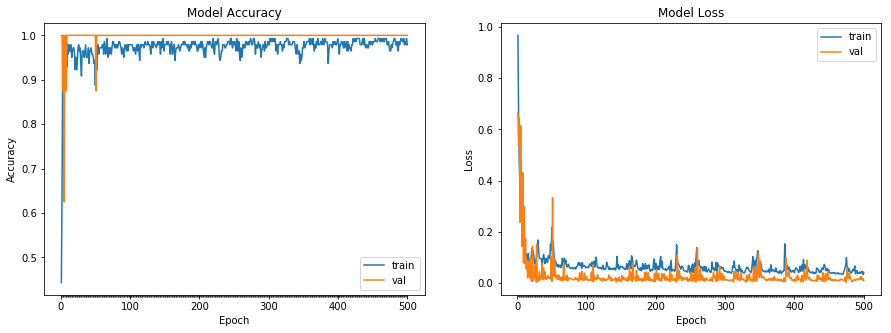

In [13]:
plot_model_history(history)

In [14]:
# 使用测试集进行评估
model.evaluate(X_test,y_test)

38/38 [==============================] - 0s 271us/step


[0.007592696402417986, 1.0]

## 5.使用模型

In [18]:
target = model.predict(np.array([[7,5.5,6.5,3.9]])).argmax()
if target == 0:
    print("Iris-setosa")
elif target == 1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-virginica
